<a href="https://colab.research.google.com/github/JakeOh/202011_itw_bd21/blob/main/lab_da/da17_apt201910.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


*   [apt_201910.csv](https://github.com/JakeOh/202011_itw_bd21/raw/main/datasets/apt_201910.csv) 파일을 읽어서 데이터 프레임 생성
    *   encoding 파라미터 설정
    *   '가격' 컬럼에는 숫자 자릿수를 구분하는 comma가 사용되고 있음(예: 10,000)
        *   '가격' 컬럼은 숫자 타입이어야 함!
*   데이터 프레임 파악
    *   info, head, tail, describe, dtypes, ...
*   '시군구' 컬럼의 값을 이용해서, 'province' 파생 변수(도, 광역시 이름) 만듦.
    *   '강원도 강릉시 견소동' -> '강원도'
*   '계약년월' 컬럼의 값을 이용해서, 'year(계약년도)', 'month(계약월)' 파생 변수 만듦.
    *   201910 -> 2019, 10
*    서울특별시 아파트들의 동별 아파트 가격의 개수, 평균, 최솟값, 최댓값
*    도/광역시별 아파트 가격 개수, 평균, 최솟값, 최댓값
*    면적이  $84 m^2$  이상  $100 m^2$  미만의 서울특별시 아파트들 중에서, 동별 아파트 가격 개수, 평균, 최솟값, 최댓값
*    면적이 $84 m^2$ 이상 $100 m^2$ 미만의 아파트들 중에서, 도/광역시별 아파트 가격 개수, 평균, 최솟값, 최댓값
    *   결과를 평균의 내림차순으로 정렬해서 출력
    *   결과를 최댓값의 내림차순으로 정렬해서 출력
    *   결과를 최솟값의 오름차순으로 정렬해서 출력


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
file_path = 'https://github.com/JakeOh/202011_itw_bd21/raw/main/datasets/apt_201910.csv'

In [10]:
apt = pd.read_csv(file_path, encoding='cp949', thousands=',')
#> encoding: 파일의 인코딩 타입(utf-8, cp949: 한글 Windows, cp1252: 영문 Windows, ...)
#> thousands: 숫자의 천자리 구분자로 사용되는 문자

In [11]:
apt.head()

,시군구,번지,본번,부번,단지명,면적,계약년월,계약일,가격,층,건축년도,도로명
0,강원도 강릉시 견소동,202,202,0,송정한신,59.800,201910,4,10900,5,1997,경강로2539번길 8
1,강원도 강릉시 견소동,202,202,0,송정한신,116.175,201910,31,18500,10,1997,경강로2539번길 8
2,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,5,25000,6,2005,경강로2539번길 22
3,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,12,20600,3,2005,경강로2539번길 22
4,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,20,20500,1,2005,경강로2539번길 22


In [12]:
apt.tail()

,시군구,번지,본번,부번,단지명,면적,계약년월,계약일,가격,층,건축년도,도로명
42753,충청북도 충주시 호암동,547-6,547,6,호반현대,59.76,201910,29,7000,3,1994,신촌2길 28
42754,충청북도 충주시 호암동,221-23,221,23,호암리버빌(1단지),84.68,201910,5,12000,15,2002,원호암5길 32
42755,충청북도 충주시 호암동,221-23,221,23,호암리버빌(1단지),84.68,201910,15,11000,7,2002,원호암5길 32
42756,충청북도 충주시 호암동,221-23,221,23,호암리버빌(1단지),84.68,201910,17,12000,14,2002,원호암5길 32
42757,충청북도 충주시 호암동,221-23,221,23,호암리버빌(1단지),84.68,201910,26,11200,11,2002,원호암5길 32


In [13]:
apt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42758 entries, 0 to 42757
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   시군구     42758 non-null  object 
 1   번지      42758 non-null  object 
 2   본번      42758 non-null  object 
 3   부번      42758 non-null  int64  
 4   단지명     42758 non-null  object 
 5   면적      42758 non-null  float64
 6   계약년월    42758 non-null  int64  
 7   계약일     42758 non-null  int64  
 8   가격      42758 non-null  int64  
 9   층       42758 non-null  int64  
 10  건축년도    42758 non-null  int64  
 11  도로명     42758 non-null  object 
dtypes: float64(1), int64(6), object(5)
memory usage: 3.9+ MB


In [14]:
apt.describe()

,부번,면적,계약년월,계약일,가격,층,건축년도
count,42758.000000,42758.000000,42758.0,42758.000000,42758.000000,42758.000000,42758.000000
mean,4.257051,75.990614,201910.0,14.246410,31719.163946,9.614575,2002.652252
std,35.928135,24.816118,0.0,8.678427,26001.893045,6.582509,9.716009
min,0.000000,10.020000,201910.0,1.000000,600.000000,-1.000000,1962.000000
25%,0.000000,59.820000,201910.0,7.000000,15500.000000,4.000000,1995.000000
50%,0.000000,82.536900,201910.0,14.000000,25400.000000,9.000000,2003.000000
75%,1.000000,84.961200,201910.0,21.000000,40000.000000,13.000000,2011.000000
max,2269.000000,291.336000,201910.0,31.000000,485000.000000,70.000000,2019.000000


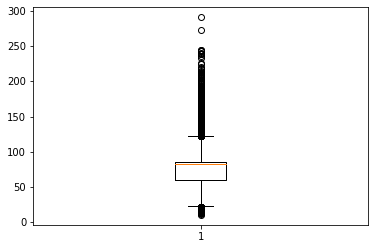

In [16]:
plt.boxplot(x=apt['면적'])
plt.show()

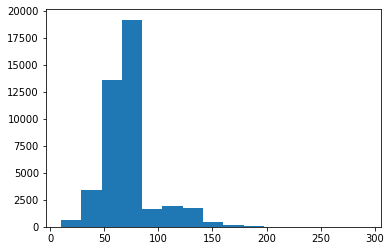

In [20]:
plt.hist(x=apt['면적'], bins=15)
plt.show()

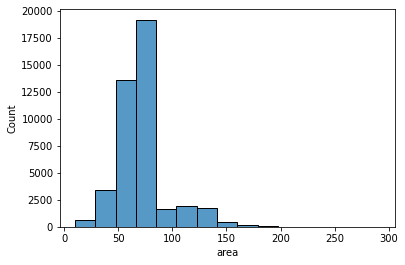

In [22]:
sns.histplot(data=apt, x='면적', bins=15)
plt.xlabel('area')
plt.show()

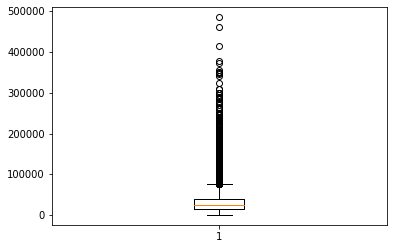

In [28]:
plt.boxplot(x=apt['가격'])
plt.show()

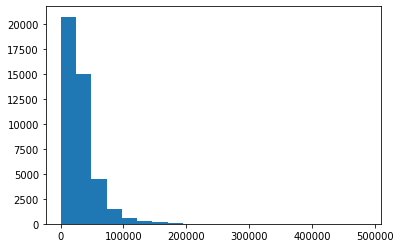

In [26]:
plt.hist(x=apt['가격'], bins=20)
plt.show()

In [35]:
apt['province'] = apt['시군구'].str.split().str[0]

In [36]:
apt.head()

,시군구,번지,본번,부번,단지명,면적,계약년월,계약일,가격,층,건축년도,도로명,province
0,강원도 강릉시 견소동,202,202,0,송정한신,59.800,201910,4,10900,5,1997,경강로2539번길 8,강원도
1,강원도 강릉시 견소동,202,202,0,송정한신,116.175,201910,31,18500,10,1997,경강로2539번길 8,강원도
2,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,5,25000,6,2005,경강로2539번길 22,강원도
3,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,12,20600,3,2005,경강로2539번길 22,강원도
4,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,20,20500,1,2005,경강로2539번길 22,강원도


In [37]:
apt['province'].unique()

array(['강원도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시', '대전광역시', '부산광역시',
       '서울특별시', '세종특별자치시', '울산광역시', '인천광역시', '전라남도', '전라북도', '제주특별자치도',
       '충청남도', '충청북도'], dtype=object)

In [43]:
apt['county'] = apt['시군구'].str.split().str[1]

In [44]:
apt.head()

,시군구,번지,본번,부번,단지명,면적,계약년월,계약일,가격,층,건축년도,도로명,province,county
0,강원도 강릉시 견소동,202,202,0,송정한신,59.800,201910,4,10900,5,1997,경강로2539번길 8,강원도,강릉시
1,강원도 강릉시 견소동,202,202,0,송정한신,116.175,201910,31,18500,10,1997,경강로2539번길 8,강원도,강릉시
2,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,5,25000,6,2005,경강로2539번길 22,강원도,강릉시
3,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,12,20600,3,2005,경강로2539번길 22,강원도,강릉시
4,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,20,20500,1,2005,경강로2539번길 22,강원도,강릉시


In [45]:
apt['county'].unique()

array(['강릉시', '고성군', '동해시', '삼척시', '속초시', '양구군', '양양군', '영월군', '원주시',
       '인제군', '정선군', '철원군', '춘천시', '태백시', '평창군', '홍천군', '화천군', '횡성군',
       '가평군', '고양덕양구', '고양일산동구', '고양일산서구', '과천시', '광명시', '광주시', '구리시',
       '군포시', '김포시', '남양주시', '동두천시', '부천시', '성남분당구', '성남수정구', '성남중원구',
       '수원권선구', '수원영통구', '수원장안구', '수원팔달구', '시흥시', '안산단원구', '안산상록구', '안성시',
       '안양동안구', '안양만안구', '양주시', '양평군', '여주시', '연천군', '오산시', '용인기흥구',
       '용인수지구', '용인처인구', '의왕시', '의정부시', '이천시', '파주시', '평택시', '포천시', '하남시',
       '화성시', '거제시', '거창군', '김해시', '남해군', '밀양시', '사천시', '산청군', '양산시',
       '의령군', '진주시', '창녕군', '창원마산합포구', '창원마산회원구', '창원성산구', '창원의창구',
       '창원진해구', '통영시', '하동군', '함안군', '함양군', '합천군', '경산시', '경주시', '고령군',
       '구미시', '군위군', '김천시', '문경시', '봉화군', '상주시', '성주군', '안동시', '영덕군',
       '영주시', '영천시', '예천군', '울릉군', '울진군', '의성군', '청도군', '청송군', '칠곡군',
       '포항남구', '포항북구', '광산구', '남구', '동구', '북구', '서구', '달서구', '달성군', '수성구',
       '중구', '대덕구', '유성구', '강서구', '금정구', '기장군', '동래구', '부산진구', '사상구',
    

In [52]:
apt['year'] = apt['계약년월'] // 100
apt['month'] = apt['계약년월'] % 100

In [53]:
apt.head()

,시군구,번지,본번,부번,단지명,면적,계약년월,계약일,가격,층,건축년도,도로명,province,county,year,month
0,강원도 강릉시 견소동,202,202,0,송정한신,59.800,201910,4,10900,5,1997,경강로2539번길 8,강원도,강릉시,2019,10
1,강원도 강릉시 견소동,202,202,0,송정한신,116.175,201910,31,18500,10,1997,경강로2539번길 8,강원도,강릉시,2019,10
2,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,5,25000,6,2005,경강로2539번길 22,강원도,강릉시,2019,10
3,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,12,20600,3,2005,경강로2539번길 22,강원도,강릉시,2019,10
4,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,20,20500,1,2005,경강로2539번길 22,강원도,강릉시,2019,10


In [58]:
apt_by_province = apt.groupby(by='province')['가격'].agg(['count', 'mean', 'max', 'min'])
apt_by_province

,count,mean,max,min
province,,,,
강원도,1143,14305.559930,45800,950
경기도,12126,36447.593765,262000,2700
경상남도,2955,20157.054484,83200,2700
경상북도,1985,15304.175819,50000,600
광주광역시,1588,21786.904282,115000,4150
대구광역시,1969,28031.251397,173500,1500
대전광역시,2487,27591.418979,150000,2400
부산광역시,2752,29593.587209,376640,1500
서울특별시,4701,69302.919166,485000,8500


In [60]:
# 거래 건수 내림차순
apt_by_province.sort_values(by='count', ascending=False)

,count,mean,max,min
province,,,,
경기도,12126,36447.593765,262000,2700
서울특별시,4701,69302.919166,485000,8500
경상남도,2955,20157.054484,83200,2700
인천광역시,2761,30196.960884,300000,4000
부산광역시,2752,29593.587209,376640,1500
대전광역시,2487,27591.418979,150000,2400
충청남도,2045,17494.407824,90000,1500
경상북도,1985,15304.175819,50000,600
대구광역시,1969,28031.251397,173500,1500


In [61]:
apt_by_province.sort_values(by='mean', ascending=False)

,count,mean,max,min
province,,,,
서울특별시,4701,69302.919166,485000,8500
경기도,12126,36447.593765,262000,2700
세종특별자치시,315,33577.206349,82200,2880
인천광역시,2761,30196.960884,300000,4000
부산광역시,2752,29593.587209,376640,1500
대구광역시,1969,28031.251397,173500,1500
대전광역시,2487,27591.418979,150000,2400
울산광역시,1562,26581.768246,81000,4000
제주특별자치도,165,25878.181818,76500,6000
